<center><br><font size=10>Final Project - Machine Learning</font><br>


#### About our project: ###

**In this project, we deal with data concerning hotel orders in the field of tourism. In the tourism industry there are many cancellations that make it difficult to properly manage orders. We face a binary classification problem with two categories: order will be canceled (1), order will not be canceled (0). We need to use the data provided with 33 features(half known and half anonymous) and around 90,000 samples to correctly predict future orders.**

**We hope you will enjoy our project!**

**<font size=3>Project Table of Contents</font>**
<a id="center"></a>
* [Part 0: Loading the data](#part0)


* [Part 1: Exploratory Data Analysis](#part1)
    * [Feature Types](#featuretypes) 
    * [Describe Data](#describe)
    * [Bar graphs categorical features](#bar)
    * [Numeric features distributions](#numeric)
    * [Missing values count](#count)
    * [Boxplots](#box)
    * [Total Orders Per Month and Cancelations Graph](#graph1)    
    * [Orders per day per month Graph](#graph2)
    * [Top orders from countries and cancelations Graph](#graph3)
    * [Label Analysis Graphs](#graph4)
    
  
* [Part 2: Pre-Processing](#part2)
    * [Missing values](#missingvalues) 
    * [New features and feature transformations](#newfeatures)
    * [Normalization](#normalization)
    * [Dimensionality reduction](#dimensionality)
    * [Other ways to reduce dimensionality](#otherways)
    * [Outliers](#outliers)
    * [Preprocessing on the test data](#preprocessingtest)
    
      
* [Part 3: Modelling](#part3)
    * [K-Nearest-Neighbors](#knn) 
    * [Logistic Regression](#lr)
    * [Random Forest](#rf)
    * [Multi-Layer Perceptron](#mlp)
    
      
* [Part 4: Model Evaluation](#part4)
    * [Confusion Matrix](#confusion)
    * [K-Fold Cross Validation](#kfold)
    * [Are the models overfitted ?](#overfitted)
    
    
    
* [Part 5: Prediction](#part5)

### Imports ###

In [1]:
import numpy as np
import pandas as pd
from calendar import month_name
import seaborn as sns
from numpy import interp
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import scipy as sp
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import KFold
import warnings


## Loading the data ##
<a id="part0"></a>


In [2]:
#Data loading
full_train = pd.read_csv('feature_data.csv',index_col = 0)
full_labels = pd.read_csv('label_data.csv',index_col = 0)
train, X_test, labels, y_test = train_test_split(full_train, full_labels, test_size=0.25,random_state = 41,shuffle = True)
train.reset_index().drop(['index'],axis=1)
warnings.filterwarnings('ignore')
train.head()

,time_until_order,order_year,order_month,order_week,order_day_of_month,adults,children,babies,country,order_type,...,anon_feat_4,anon_feat_5,anon_feat_6,anon_feat_7,anon_feat_8,anon_feat_9,anon_feat_10,anon_feat_11,anon_feat_12,anon_feat_13
87060,14.0,2016,April,week_16,13,2,1.0,0,PRT,Direct,...,3,5.0,0.0,1.0,1,0.0,0.606396,3.817149,True,NaN
114706,0.0,2017,June,week_25,23,1,0.0,0,PRT,Aviation,...,0,0.0,0.0,0.0,0,0.0,0.788284,NaN,False,NaN
79425,137.0,2016,January,week_5,27,1,0.0,0,PRT,Groups,...,0,NaN,45.0,0.0,0,0.0,0.376494,11.751512,False,NaN
77630,11.0,2015,September,week_39,22,2,0.0,0,DNK,Groups,...,0,1.0,0.0,0.0,0,0.0,0.473832,3.474824,True,NaN
13783,36.0,2017,August,week_35,30,2,2.0,0,GBR,Online TA,...,2,2.0,0.0,0.0,1,1.0,0.402207,6.150273,False,NaN


* [Get back to Project Table of Contents](#center)

## Part 1: Exploratory Data Analysis ##
<a id="part1"></a>

### Feature Types ###
<a id="featuretypes"></a>

In [3]:
# All of the data's features and feature types
train.dtypes
# We can see that we have many different data types in our features, we will handle them later.

time_until_order       float64
order_year               int64
order_month             object
order_week              object
order_day_of_month       int64
adults                   int64
children               float64
babies                   int64
country                 object
order_type              object
acquisition_channel     object
prev_canceled            int64
prev_not_canceled        int64
changes                float64
deposit_type            object
agent                  float64
company                float64
customer_type           object
adr                    float64
anon_feat_0            float64
anon_feat_1              int64
anon_feat_2              int64
anon_feat_3              int64
anon_feat_4              int64
anon_feat_5            float64
anon_feat_6            float64
anon_feat_7            float64
anon_feat_8              int64
anon_feat_9            float64
anon_feat_10           float64
anon_feat_11           float64
anon_feat_12              bool
anon_fea

* [Get back to Project Table of Contents](#center)

### Describe Data ###
<a id="describe"></a>

In [4]:
train.describe()
# Here we can see some basic statisical data on our numerical varaibles

,time_until_order,order_year,order_day_of_month,adults,children,babies,prev_canceled,prev_not_canceled,changes,agent,...,anon_feat_3,anon_feat_4,anon_feat_5,anon_feat_6,anon_feat_7,anon_feat_8,anon_feat_9,anon_feat_10,anon_feat_11,anon_feat_13
count,57621.000000,67156.000000,67156.00000,67156.000000,67152.000000,67156.000000,67156.000000,67156.000000,64520.000000,57958.000000,...,67156.000000,67156.000000,64132.000000,63972.000000,63948.000000,67156.000000,64319.000000,65093.000000,63446.000000,4384.000000
mean,103.758352,2016.156486,15.82015,1.858568,0.103437,0.007967,0.087006,0.139660,0.224117,86.804289,...,0.032119,0.993537,1.331862,2.408366,0.062895,0.573054,0.336728,0.427029,8.850715,0.367929
std,107.064610,0.707643,8.77165,0.551572,0.397561,0.090395,0.844879,1.556621,0.659821,110.925020,...,0.176318,1.700049,1.877881,18.037416,0.243355,0.794728,0.472595,0.128025,5.242127,0.482297
min,0.000000,2015.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.161008,0.059036,0.000000
25%,18.000000,2016.000000,8.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328170,4.445546,0.000000
50%,69.000000,2016.000000,16.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.424962,8.416963,0.000000
75%,160.000000,2017.000000,23.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.510935,12.723282,1.000000
max,737.000000,2017.000000,31.00000,50.000000,10.000000,2.000000,26.000000,72.000000,21.000000,531.000000,...,1.000000,9.000000,11.000000,391.000000,2.000000,5.000000,1.000000,0.907525,27.172399,1.000000


* [Get back to Project Table of Contents](#center)

### Bar graphs categorical features ###
<a id="bar"></a>

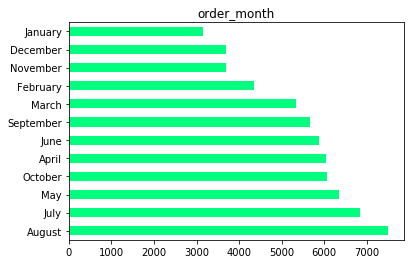

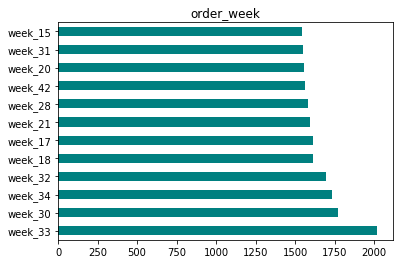

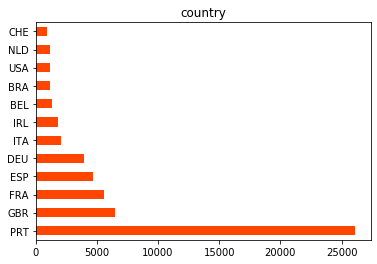

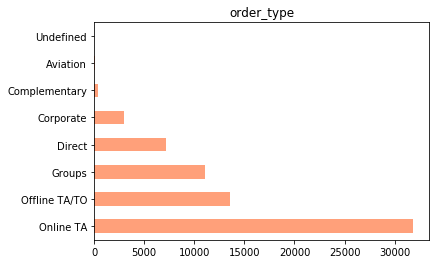

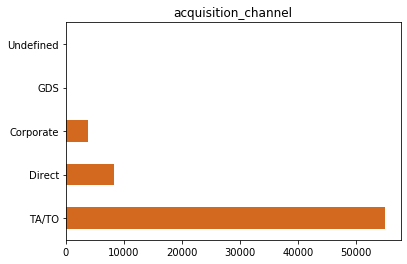

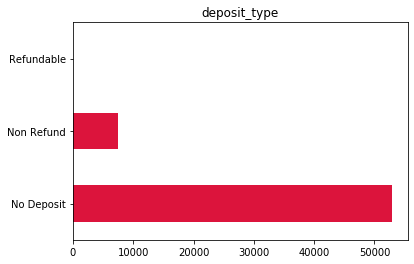

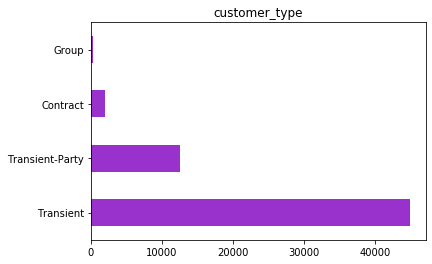

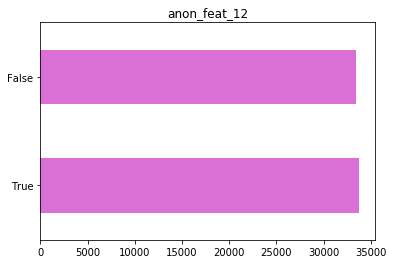

In [5]:
# Since the describe table doesn't tell us much about the categorical variables, lets plot
# bar graphs of each of the categorical features so that we can get an idea of how they distribute

colors = ['springgreen', 'teal', 'orangered', 'lightsalmon', 'chocolate', 'crimson', 'darkorchid', 'orchid']
i = 0
for col in train.select_dtypes(include = [object,bool]):
    train[col].value_counts().head(12).plot.barh(color = colors[i])
    i += 1
    plt.title(col)
    plt.show()

* [Get back to Project Table of Contents](#center)

### Numeric features distributions ###
<a id="numeric"></a>

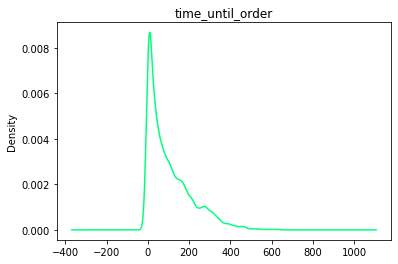

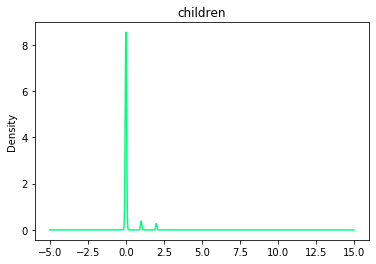

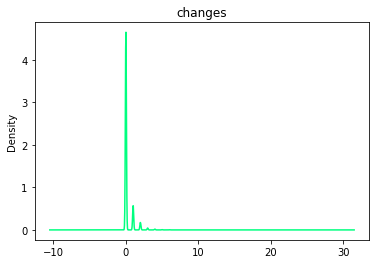

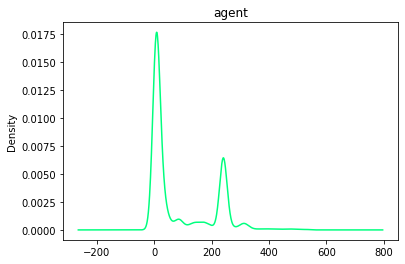

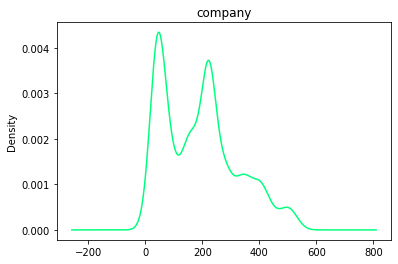

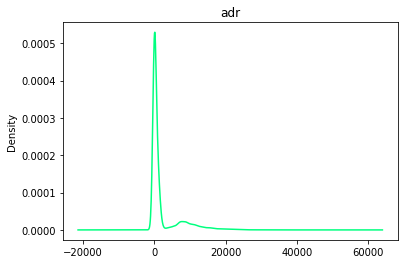

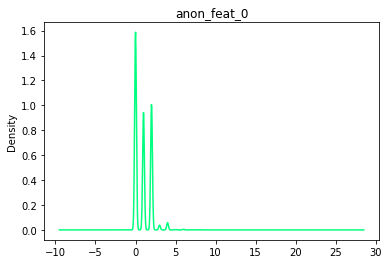

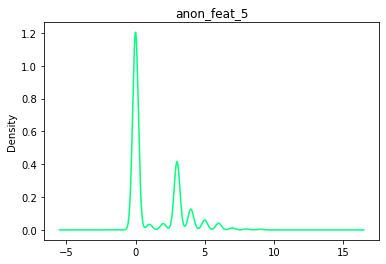

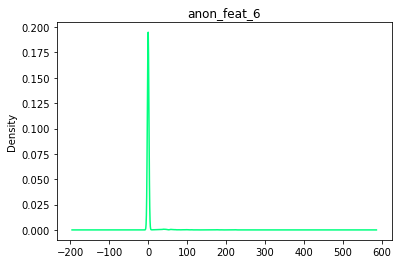

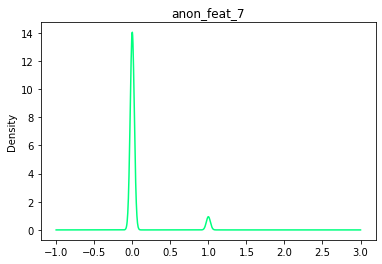

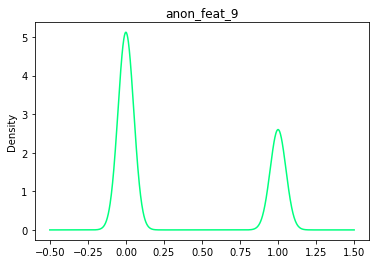

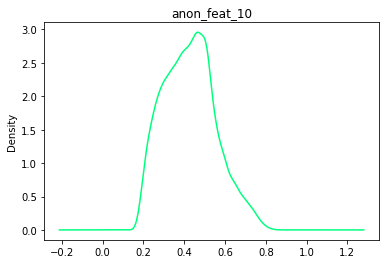

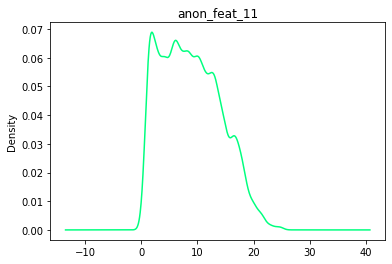

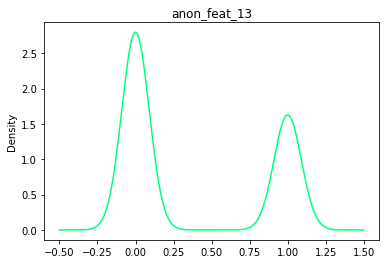

In [6]:
# Let's see how our numeric features distribute
def numeric_features_density(df):
    column_numeric = df.select_dtypes(include = [float,int]).columns.tolist() 
    for col in column_numeric:
        df[col].plot.density(color = 'springgreen')
        plt.title(col)
        plt.show()
numeric_features_density(train)

* [Get back to Project Table of Contents](#center)

### Missing values count ###
<a id="count"></a>

In [7]:
# Let's check how many missing values we have in our dataframe
train.isnull().sum().sort_values(ascending = False)

company                63335
anon_feat_13           62772
time_until_order        9535
agent                   9198
customer_type           7400
deposit_type            6722
anon_feat_11            3710
country                 3215
anon_feat_7             3208
anon_feat_6             3184
anon_feat_5             3024
anon_feat_9             2837
changes                 2636
anon_feat_0             2577
order_month             2567
adr                     2245
anon_feat_10            2063
children                   4
anon_feat_1                0
babies                     0
order_year                 0
order_week                 0
order_day_of_month         0
adults                     0
acquisition_channel        0
anon_feat_4                0
order_type                 0
prev_canceled              0
anon_feat_3                0
anon_feat_8                0
anon_feat_12               0
anon_feat_2                0
prev_not_canceled          0
dtype: int64

* [Get back to Project Table of Contents](#center)

### Boxplots ###
<a id="box"></a>

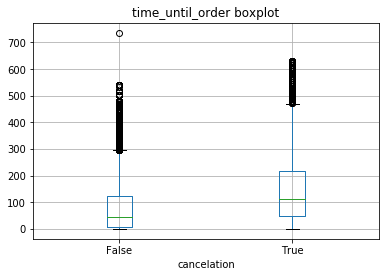

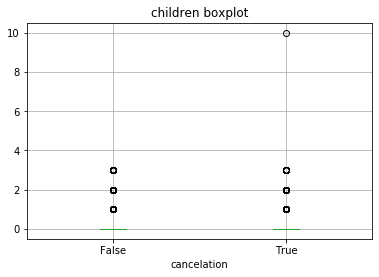

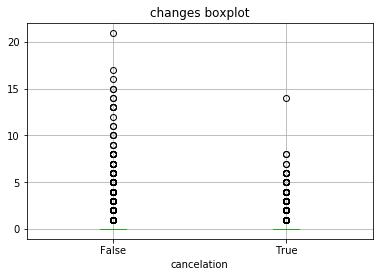

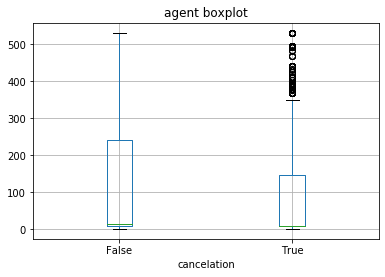

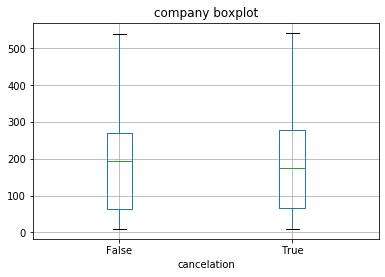

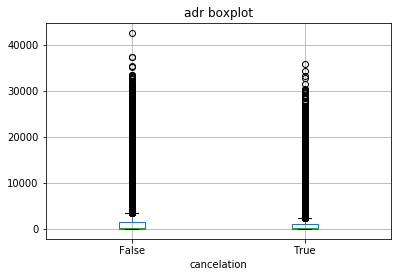

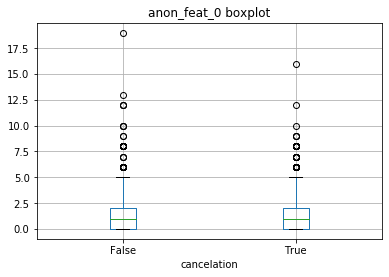

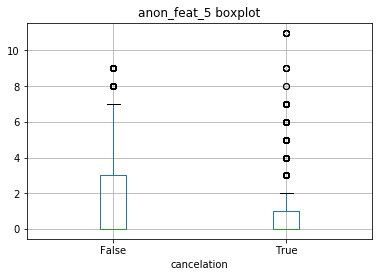

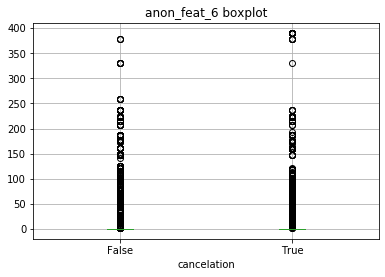

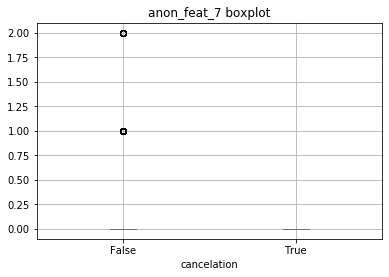

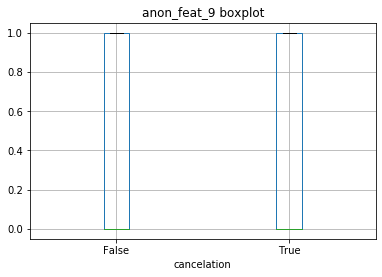

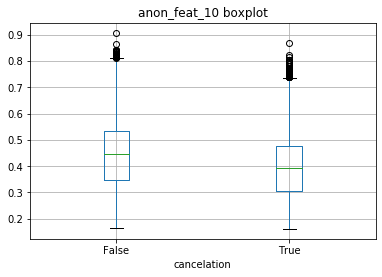

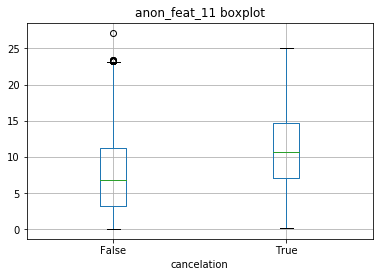

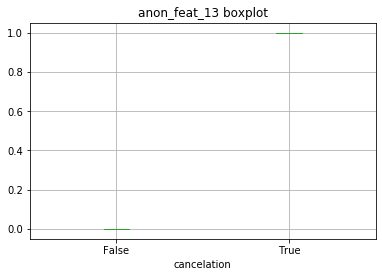

In [8]:
#lets use some boxplots, we want to see outliers of our features.
def features_box_plot(df):
    for col in df.select_dtypes(include = [float,int]).columns.tolist():
        df.boxplot(column = col, by = 'cancelation')
        plt.title(col + ' boxplot')
        plt.suptitle('')
        plt.show()
df_boxplot = train.join(labels)
features_box_plot(df_boxplot)

* [Get back to Project Table of Contents](#center)

### Total Orders and Cancelations Per Month Graph ###
<a id="graph1"></a>

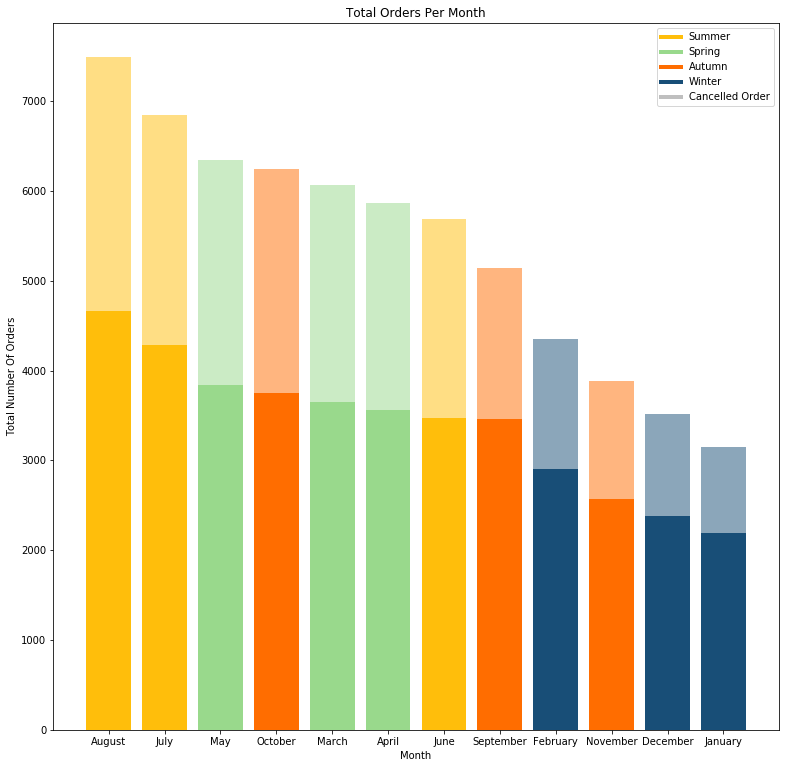

In [9]:
# Let's create a graph that shows us how many orders we have per month and how many of those orders were 
# canceled

train_with_labels = train.join(labels)
df_month = train_with_labels[['order_month', 'cancelation']].copy()
df_month['total_month_orders'] = df_month.groupby('order_month').transform('count')
final_df = df_month.groupby(['order_month', 'cancelation']).agg({'order_month':'first',\
                                                                 'cancelation':'size'})
canceled_dict = {} 
not_canceled_dict = {}
for i in range(0, 24, 2):
    not_canceled_dict[final_df['order_month'][i]] = final_df['cancelation'][i]
    canceled_dict[final_df['order_month'][i]] = final_df['cancelation'][i + 1]
not_canceled_dict = dict(sorted(not_canceled_dict.items(), key = lambda x: x[1], reverse = True))
canceled_dict = dict(sorted(canceled_dict.items(), key = lambda x: x[1], reverse = True))
fig, ax = plt.subplots(figsize = (13, 13))
season_colors = ['#ffbe0b', '#ffbe0b', '#99d98c', '#ff6d00', '#99d98c', '#99d98c', '#ffbe0b', \
                 '#ff6d00', '#184e77', '#ff6d00', '#184e77', '#184e77']
ax.bar(list(not_canceled_dict.keys()), list(not_canceled_dict.values()),  \
       color = season_colors, linewidth = 2, label = 'not_canceled')
ax.bar(list(not_canceled_dict.keys()), list(canceled_dict.values()), bottom=list(not_canceled_dict.values()),
        alpha = 0.5, color = season_colors, linewidth = 2, label = 'canceled')
plt.title('Total Orders Per Month')
plt.xlabel('Month')
plt.ylabel('Total Number Of Orders')
legend_lines = [Line2D([0], [0], color = '#ffbe0b', lw=4),
                Line2D([0], [0], color = '#99d98c', lw=4),
                Line2D([0], [0], color = '#ff6d00', lw=4),
                Line2D([0], [0], color = '#184e77', lw=4),
                Line2D([0], [0], color = 'black', lw=4, alpha = 0.25)]
ax.legend(legend_lines, ['Summer', 'Spring', 'Autumn', 'Winter', 'Cancelled Order'])


plt.show()

* [Get back to Project Table of Contents](#center)

### Orders per day per month Graph ###
<a id="graph2"></a>

Text(0.5, 0.98, 'Orders per day per month')

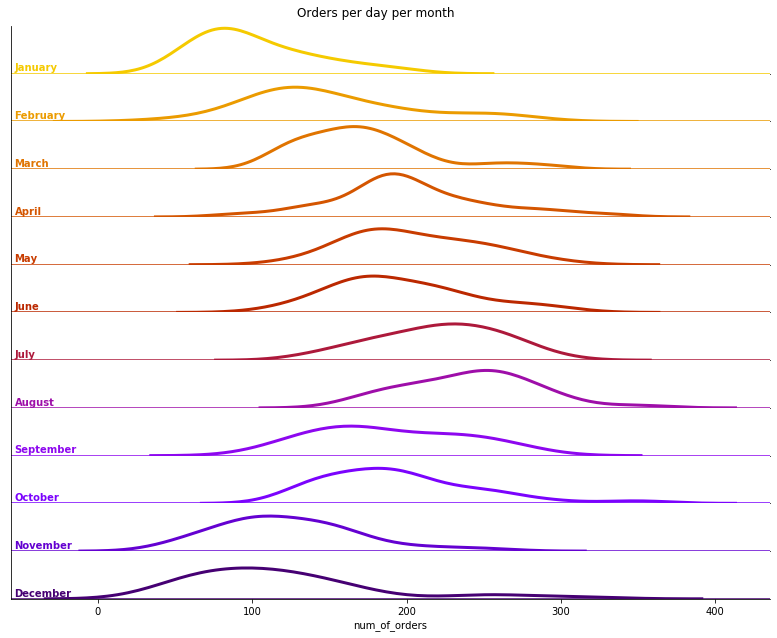

In [10]:
# Let's see how the amount of orders each month distribute throught the month
day_df = train[['order_month', 'order_day_of_month']].copy()
day_df = day_df.dropna()
day_df = day_df.sort_values(['order_month', 'order_day_of_month'])
day_df = day_df.groupby(['order_month', 'order_day_of_month'])\
        .agg({'order_day_of_month':'size'})
day_df_2 = train[['order_month', 'order_day_of_month']].copy()
day_df_2 = day_df_2.groupby(['order_month', 'order_day_of_month'])\
            .agg({'order_month':'first', 'order_day_of_month':'first'})
day_df_2['order_per_day'] = day_df
day_df_2['order_month'].astype('|S')
month_dict = {month_name[i]: i for i in range(1, 13)}
day_df_2['order_month'] = day_df_2['order_month'].map(month_dict)
day_df_2 = day_df_2.rename(columns = {'order_month' : 'order_month_num', 'order_day_of_month' : \
                                     'orders_on_day'})
day_df_3 = day_df_2.sort_values(['order_month_num', 'orders_on_day'])
g = sns.FacetGrid(day_df_3, row = 'order_month_num', hue = 'order_month_num', aspect=15, height = 0.75\
                 , palette = 'gnuplot_r')
g.map(sns.kdeplot, 'order_per_day', clip_on=True, alpha=1, linewidth=3)
g.map(plt.axhline)
def label(x, color, label):
    label = [month_name[i] for i in range(1, 13)][x[1] - 1]
    ax = plt.gca()
    ax.text(0.005, 0.125, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, 'order_month_num')
g.set_xlabels('num_of_orders')
g.fig.subplots_adjust(hspace=-0.00035)
g.set_titles("")
g.set(yticks=[])
g.fig.subplots_adjust(top = 0.95)
g.fig.suptitle('Orders per day per month')


* [Get back to Project Table of Contents](#center)

### Top orders from countries and cancelation amount Graph ###
<a id="graph3"></a>

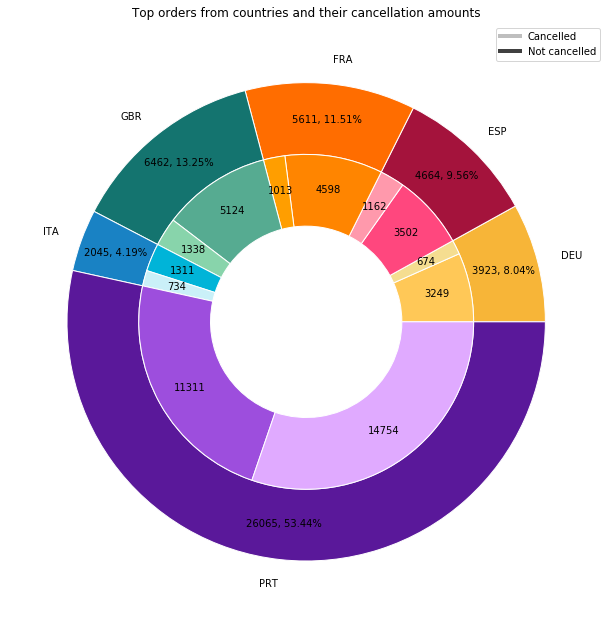

In [11]:
# Let's see how many orders are cancelled within each of the top 6 leading countries in order count
countries = train['country'].value_counts().to_frame().head(6)
countries = countries.index.tolist()
country_df = train_with_labels[['country', 'cancelation']]
country_df = country_df.groupby(['country', 'cancelation']).agg({'country':'first', 'cancelation':'size'})
country_df = country_df[country_df['country'].isin(countries)]
country_df = country_df.rename(columns = {'country' : 'country_name'})
country_df['sum_of_orders'] = country_df.groupby(['country_name']).transform('sum')
cancelled_uncancelled = list(country_df['cancelation'])
total_orders = list(country_df['sum_of_orders'])[::2]
fig, ax = plt.subplots(figsize = (11, 11))
size = 0.3
def number_of_orders_with_percent(orders):
    # function(autopct in the ax.pie call) recieves percentage of pie(pct) from matplotlib, 
    # we calculate its value using the pct value provided and return it as a string
    # since autpct can recieve a callable, we return a function aswell
    return lambda x: f'{int(round(x * sum(orders) / 100))}, {round(x, 2)}%'
def number_of_orders(orders):
    return lambda x: f'{int(round(x * sum(orders) / 100))}'
ax.pie(country_df['sum_of_orders'][::2], radius=1,\
       colors = ['#f7b538', '#a4133c', '#ff6d00', '#14746f', '#1982c4', '#5a189a'], \
       wedgeprops = dict(width = size, edgecolor='w'), labels = ['DEU','ESP','FRA','GBR','ITA','PRT'], \
       autopct = number_of_orders_with_percent(cancelled_uncancelled), pctdistance = 0.85)
ax.pie(country_df['cancelation'].ravel(), radius = 1 - size, wedgeprops=dict(width=size, edgecolor='w')
      , colors = ['#ffc857', '#f5dd90', '#ff477e', '#ff99ac', '#ff8500', '#ff9e00', '#56ab91'\
                 ,'#88d4ab', '#00b4d8', '#caf0f8', '#9d4edd', '#e0aaff'],\
                   autopct = number_of_orders(cancelled_uncancelled), pctdistance = 0.8)

legend_lines = [Line2D([0], [0], color = 'black', lw=4, alpha = 0.25),
               Line2D([0], [0], color = 'black', lw=4, alpha = 0.75)]
ax.set(title='Top orders from countries and their cancellation amounts')
ax.legend(legend_lines, ['Cancelled', 'Not cancelled'])

* [Get back to Project Table of Contents](#center)

### Label Analysis Graphs ###
<a id="graph4"></a>

Text(0.5, 1.0, 'How the labels split on the test data')

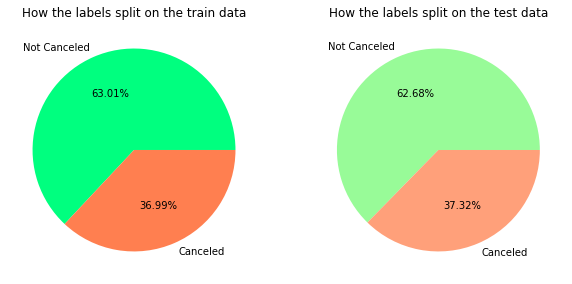

In [12]:
# Let's check how balanced our labels are for the train data, and the test data, to make sure
# the proportions of cancelled and un-cancelled orders is the same.
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10, 10))
ax1.pie(labels['cancelation'].value_counts(),
        labels=['Not Canceled','Canceled'], 
        autopct='%.2f%%',
        colors = ['springgreen','coral'])
ax1.set_title("How the labels split on the train data")
ax2.pie(y_test['cancelation'].value_counts(),
        labels=['Not Canceled','Canceled'], 
        autopct='%.2f%%',
        colors = ['palegreen','lightsalmon'])
ax2.set_title("How the labels split on the test data")


* [Get back to Project Table of Contents](#center)

## Part 2: Pre-Processing
<a id="part2"></a>

### Missing values ###
<a id="missingvalues"></a>

Are there any missing values ? 
As we saw in the exploratory data analysis, we have many missing values in our dataset

How did you handle the missing values and why ?
For the two features where we had a significant amount of missing values we decided that we would remove company entirely, and keep anon_feat_13 since as we'll see soon, it has full correlation with the label data for the values that are present(0's and 1's). For anon_feat_13, we'll fill our missing valuse with -1, in hopes that our model will recognize the correlation between the features and the labels values. For the other features, where we have enough data, we would like to fill our existing null values, so we'll choose the median (to reduce the effect of outliers) for numeric features and the most frequent for the categorical data.

In [13]:
# In order to properly explore the data, we will need to make some slight adjustments, like changing 
# month and week names to their appropriate numbers, removing company (which is mostly null), 
# and filling missing values for others.

def first_aid_for_data(df):
    train_copy = df.copy()
    # as we saw - company has too many missing values, so we'll remove it
    train_copy = train_copy.drop(["company"],axis="columns")
    # filling anon_feat_13 with -1's.
    train_copy['anon_feat_13'] = train_copy['anon_feat_13'].fillna(-1)
    #we still have many missing values - lets fill the non-numerical features first
    column_object = train_copy.select_dtypes(include = [object,bool]).columns.tolist()
    for col in column_object:
        train_copy.loc[train_copy[col] == 'Undefined', col] = train_copy[col].value_counts().idxmax()
        train_copy[col].fillna(train_copy[col].value_counts().idxmax(), inplace=True)
    
    #lets now fill the numerical features
    column_not_object = train_copy.select_dtypes(include = [float,int]).columns.tolist() 
    for col in column_not_object:
        train_copy[col].fillna(train_copy[col].median(), inplace=True)
    
    #change anon_feat_12 from True/False to 0(False)/1(True)
    train_copy['anon_feat_12'] = train_copy['anon_feat_12'].astype(int)
    #change order_month to month number
    train_copy['order_month'].astype('|S')
    month_dict = {month_name[i]: i for i in range(1, 13)}
    train_copy['order_month'] = train_copy['order_month'].map(month_dict, int)
    #in order_week: remove "week_" and stay with the number of week
    train_copy['order_week'] = train_copy["order_week"].map(lambda x: x.lstrip('week_'))
    train_copy['order_week'] = train_copy["order_week"].astype(int)
    return train_copy

processed_train = first_aid_for_data(train)
processed_train.head()

,time_until_order,order_year,order_month,order_week,order_day_of_month,adults,children,babies,country,order_type,...,anon_feat_4,anon_feat_5,anon_feat_6,anon_feat_7,anon_feat_8,anon_feat_9,anon_feat_10,anon_feat_11,anon_feat_12,anon_feat_13
87060,14.0,2016,4,16,13,2,1.0,0,PRT,Direct,...,3,5.0,0.0,1.0,1,0.0,0.606396,3.817149,1,-1.0
114706,0.0,2017,6,25,23,1,0.0,0,PRT,Aviation,...,0,0.0,0.0,0.0,0,0.0,0.788284,8.416963,0,-1.0
79425,137.0,2016,1,5,27,1,0.0,0,PRT,Groups,...,0,0.0,45.0,0.0,0,0.0,0.376494,11.751512,0,-1.0
77630,11.0,2015,9,39,22,2,0.0,0,DNK,Groups,...,0,1.0,0.0,0.0,0,0.0,0.473832,3.474824,1,-1.0
13783,36.0,2017,8,35,30,2,2.0,0,GBR,Online TA,...,2,2.0,0.0,0.0,1,1.0,0.402207,6.150273,0,-1.0


* [Get back to Project Table of Contents](#center)

### New features and feature transformations ###
<a id="newfeatures"></a>

In [14]:
# We'll create some pre-processing functions, and later test them on our model to see how they perform

# dummy variables 
# One of the problems with this function is that using get_dummies on the country feature will cause our
# dimensinality to increase significantly, so we will try using label encoding for countries
def make_dummies(df):
    train_copy_dummies = df.copy()
    a = pd.get_dummies(df['deposit_type'], prefix = 'deposit')
    b = pd.get_dummies(df['customer_type'], prefix = 'customer_type')
    c = pd.get_dummies(df['acquisition_channel'], prefix = 'acquisition_channel')
    d = pd.get_dummies(df['order_type'], prefix = 'order_type')
    train_copy_dummies = train_copy_dummies.join([a,b,c,d])
    countries = train['country'].value_counts().to_frame().head(50)
    countries = countries.index.tolist()
    # since countries is too large, use label encoding instead of dummy variables
    country_dict = {countries[i - 1]:i for i in range(1, len(countries) + 1)}
    train_copy_dummies['country'] = train_copy_dummies['country'].map(country_dict)
    train_copy_dummies['country'] = train_copy_dummies['country'].fillna(0)
    train_copy_dummies = train_copy_dummies.drop(columns = ['deposit_type','customer_type',\
                                                            'acquisition_channel','order_type'])
    return train_copy_dummies

# Function to encode categorical variables 
# We chose to perform label encoding by hand to control the value each label gets, however in practice
# we found that encoding them arbitrarily by order performed the best
def handle_categories(df):
    temp_df = df.copy()
    countries = train['country'].value_counts().to_frame().head(50)
    countries = countries.index.tolist()
    country_dict = {countries[i - 1]:i for i in range(1, len(countries) + 1)}
    temp_df['country'] = temp_df['country'].map(country_dict)
    temp_df['country'] = temp_df['country'].fillna(0)
    temp_df['country'] = temp_df['country'].map(int)
    deposit_dict = {'Non Refund' : 1, 'Refundable': 2, 'No Deposit': 3}
    temp_df['deposit_type'] = temp_df['deposit_type'].map(deposit_dict).map(int)
    acquisition_dict = {'Direct' : 1, 'Corporate': 2, 'GDS': 3, 'Undefined': 4, 'TA/TO' : 5}
    temp_df['acquisition_channel'] = temp_df['acquisition_channel'].map(acquisition_dict).map(int)
    customer_dict = {'Transient': 1, 'Transient-Party': 2, 'Contract': 3, 'Group': 4}
    temp_df['customer_type'] = temp_df['customer_type'].map(customer_dict).map(int)
    order_dict = {'Online TA': 1, 'Offline TA/TO': 2, 'Groups': 3, 'Direct': 4, 'Corporate' : 5 \
                    ,'Complementary' : 6, 'Aviation' : 7, 'Undefined' : 8}
    temp_df['order_type'] = temp_df['order_type'].map(order_dict).map(int)
    return temp_df


#concat some features into one feature
#create 'family_size' feature from adults,children and babies
def family_size(df): 
    train_copy_concat_features = df.copy()
    train_copy_concat_features['family_size'] = train_copy_concat_features['adults'] + train_copy_concat_features['children'] + train_copy_concat_features['babies']
    train_copy_concat_features = train_copy_concat_features.drop(['adults','children','babies'],axis=1)
    train_copy_concat_features['family_size'] = train_copy_concat_features['family_size'].map(int) 
    return train_copy_concat_features

# Function to split order day of month into 3 groups (0 = early month, 1 = mid month, 2 = end of month)
def day_fix(df):
    temp_df = df.copy()
    temp_df["order_day_of_month"] = temp_df["order_day_of_month"].map(lambda x:1 if (x > 10 and x < 20) \
                                                                      else 0 if (x < 10) \
                                                                      else 2)
    return temp_df

# we add +1 because we can't use log on 0 values, log_transform may help logistic_regression do better,
# we'll try it later at the modelling stage.
def log_transform(df):
    log_transform_data = df.copy()
    log_transform_data = log_transform_data.transform(lambda x:x+1)
    for col in log_transform_data:  
        if col != 'anon_feat_13':
            log_transform_data[col] = log_transform_data[col].transform(np.log)
    return log_transform_data

# When prev_canceled == prev_not_canceled == 9 it means that there were no past reservations for the 
# specific sample, we wanted to check how it may affect our models results.
def cancel_eval(df):
    temp_df = df.copy()
    temp_df['cancel_eval'] = np.where(temp_df['prev_canceled'] == temp_df['prev_not_canceled'], 0,\
                                     (np.where(temp_df['prev_canceled'] > temp_df['prev_not_canceled'],\
                                              temp_df['prev_canceled'] - temp_df['prev_not_canceled'],\
                                               temp_df['prev_canceled'] - temp_df['prev_not_canceled'])))
    return temp_df


# For now we will only run handle_categories, later we'll expeeriment with our 
# other pre-processing functions.
processed_train = handle_categories(processed_train)

* [Get back to Project Table of Contents](#center)

### Normalization ###
<a id="normalization"></a>
Is the data normalized ?

The data is not normalized. Using df.describe() we saw that for most of our data the mean and std of our features is outside the 0 - 1 range, so it's not min-max scaled, and since none of our features have a mean of 0 and standard deviation of 1, it is not standardized.

Should we normalize the data and why is it important ? The purpose of normalizing the data is to rescale it such that all of our numeric features are on the same scale, however the relative distance between each two points is kept. 

For certain models, such as K-NN, we would benefit from normalizing since if we dont normalize our data, features with different magnitudes will not contribute to our model equally. Another case where we have to normalize our data is when doing PCA, since we are looking for directions of maximum variance, we would like to have features on the same scale so that calculated variance would not be affected by scale. However decision tree based models like random forest, do not need normalizing since in random forest we perform each split according to a single feature, meaning all of the calculations for the split are on the same scale. 

In [15]:
# As we learned in class, we'll make 2 functions to normalize our data, later on we'll see which function 
# is better for our results.

# Data normalization using MinMaxScaler (to get the data to be 0-1)
def data_normalization_minmax(df, df_test = None):
    normalized = df.copy()        
    min_max_scaler = MinMaxScaler()
    scaler = min_max_scaler.fit(normalized)
    scaled_data = scaler.transform(normalized)
    df_scaled_train_data = pd.DataFrame(scaled_data,columns=normalized.columns)
    if isinstance(df_test, pd.DataFrame):
        normalized_test = df_test.copy()
        scaled_test_data = scaler.transform(df_test)
        df_scaled_test_data = pd.DataFrame(scaled_test_data,columns=normalized.columns)
        return df_scaled_train_data, df_scaled_test_data
    return df_scaled_train_data

# Data normalization using z-scores
def data_normalization_standard(df, df_test = None):
    normalized = df.copy()
    standard_scaler = StandardScaler()
    scaler = standard_scaler.fit(normalized)
    scaled_data = scaler.transform(normalized)
    df_scaled_train_data = pd.DataFrame(scaled_data,columns=normalized.columns)
    if isinstance(df_test, pd.DataFrame):
        normalized_test = df_test.copy()
        scaled_test_data = scaler.transform(normalized_test)
        df_scaled_test_data = pd.DataFrame(scaled_test_data, columns = normalized.columns)
        return df_scaled_train_data, df_scaled_test_data
    return df_scaled_train_data

* [Get back to Project Table of Contents](#center)

### Dimensionality reduction ###
<a id="dimensionality"></a>

Is the dimensionality of the data too large ? Yes. We can see from our graph "number of components needed to explain variance" (seen below), that we can already explain around 95% of our datas variance using around 25 features, and our original data-set has 33.

How can large dimensionality cause problems with our models, and how can we recognize it ? From a bias-variance standpoint, the more dimensions we have the higher variance we will have in our model, since the likelihood of us seeing a certain combination of features decreases. Furthermore, we saw in class that there is a point where the more dimensions we add to the data, the harder it is for models to learn from it. In order to reduce our datas dimensioanlity, we can use PCA, and as we saw in the graph below, we can explain most of the datas variance with less features, or we can use feature selection, and remove certain features according to metrics such as correlation and the amount of null values.


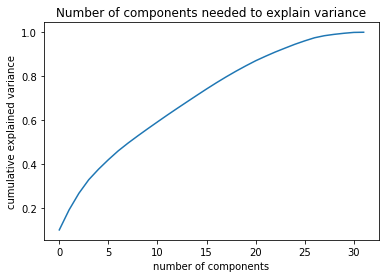

explained variance ratio:  0.9453046245364229


In [16]:
#PCA on the scaled data (after using data normalization functions) to reduce dimensionality

#in order to know how many components should we give to the PCA algorithm, we can search for the cumulative explained
#variance ratio as a function of the number of components. let's make a function that will search find the number
#of components needed to explain a certain amount of variance.

PCA_train = train.copy()
PCA_train = first_aid_for_data(PCA_train)
PCA_train = handle_categories(PCA_train)
PCA_train = data_normalization_standard(PCA_train)

# Show a graph of the percent of explained variance in relation to the number of components
def pca_graph_variance_explained(df):
    pca_data = df.copy()        
    pca = PCA().fit(pca_data)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.title('Number of components needed to explain variance')
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()
    
pca_graph_variance_explained(PCA_train)

# Perform PCA
def pca_with_needed_components(df, n, df_test = None):
    pca_data = df.copy()
    pca_model = PCA(n_components=n)
    pca_model.fit(pca_data)
    pca_X = pca_model.transform(pca_data)
    df_pca = pd.DataFrame(data = pca_X)
    if isinstance(df_test, pd.DataFrame):
        df_pca_test = df_test.copy()
        PCA_X_test = pca_model.transform(df_pca_test)
        df_pca_test = pd.DataFrame(data = PCA_X_test)
        return df_pca, df_pca_test
    print('explained variance ratio: ',pca_model.explained_variance_ratio_.sum())
    return df_pca

final_pca_train = pca_with_needed_components(PCA_train, 25)


* [Get back to Project Table of Contents](#center)

### Other ways to reduce dimensionality ###
<a id="otherways"></a>

After seeing PCA can't effectively reduce the dimensionality of our data-set, since we would need alot of principal components to keep a good amount of variance, but lose the explainibility of our data, let's attempt other ways to reduce the dimensionality of our dataset.

At the modelling stage, we will use the data we observe here to decide which features to remove. 

In [17]:
# Let's check the correlations on the original data (before pre processing)
def corr_features_check(df):
    corr = df.corr(method = 'pearson').abs()
    return corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)

corr_features_check(train)
# Now we'll check the corelltion between our features and labels so that we can get a read on features with 
# high correlation, which means we can consider removing one of two highly correlated features, to reduce 
# the dimensionality of our data.
# Immediately we can see that time_until_order and anon_feat_11, agent and anon_feat_9,
# and anon_feat_4 and anon_feat_5 are highly correlated.

,time_until_order,order_year,order_day_of_month,adults,children,babies,prev_canceled,prev_not_canceled,changes,agent,company,adr,anon_feat_0,anon_feat_1,anon_feat_2,anon_feat_3,anon_feat_4,anon_feat_5,anon_feat_6,anon_feat_7,anon_feat_8,anon_feat_9,anon_feat_10,anon_feat_11,anon_feat_12,anon_feat_13
time_until_order,1,0.038,0.0044,0.13,0.038,0.019,0.084,0.073,0.0033,0.075,0.15,0.011,0.088,0.17,0.0024,0.13,0.1,0.17,0.18,0.12,0.097,0.08,0.49,0.96,0.0076,0.3
order_year,0.038,1,0.002,0.036,0.053,0.01,0.12,0.028,0.03,0.064,0.26,0.023,0.02,0.029,0.067,0.0065,0.094,0.036,0.054,0.014,0.11,0.032,0.04,0.048,0.00029,0.011
order_day_of_month,0.0044,0.002,1,7.3e-05,0.016,0.00091,0.024,0.0029,0.011,0.0025,0.052,0.043,0.015,0.028,0.0096,0.0061,0.018,0.01,0.022,0.0077,0.0046,0.0046,0.0096,0.01,0.00064,0.00062
adults,0.13,0.036,7.3e-05,1,0.034,0.023,0.0087,0.11,0.051,0.036,0.2,0.13,0.092,0.094,0.023,0.15,0.22,0.15,0.0098,0.02,0.13,0.0095,0.13,0.15,0.0011,0.057
children,0.038,0.053,0.016,0.034,1,0.022,0.025,0.021,0.047,0.043,0.03,0.15,0.048,0.045,0.05,0.034,0.38,0.33,0.033,0.058,0.081,0.047,0.0013,0.03,0.0023,0.021
babies,0.019,0.01,0.00091,0.023,0.022,1,0.0081,0.0074,0.087,0.044,0.017,0.017,0.02,0.022,0.0063,0.0095,0.04,0.043,0.011,0.039,0.11,0.049,0.011,0.019,0.0096,0.018
prev_canceled,0.084,0.12,0.024,0.0087,0.025,0.0081,1,0.16,0.027,0.013,0.19,0.032,0.016,0.017,0.0028,0.087,0.05,0.06,0.0057,0.018,0.048,0.011,0.033,0.076,0.0048,0.11
prev_not_canceled,0.073,0.028,0.0029,0.11,0.021,0.0074,0.16,1,0.0091,0.019,0.21,0.039,0.042,0.047,0.04,0.41,0.021,0.0019,0.0099,0.04,0.041,0.0022,0.074,0.094,0.0036,0.066
changes,0.0033,0.03,0.011,0.051,0.047,0.087,0.027,0.0091,1,0.07,0.12,0.04,0.052,0.093,0.023,0.011,0.047,0.096,0.015,0.065,0.05,0.076,0.0048,0.0025,0.0045,0.14
agent,0.075,0.064,0.0025,0.036,0.043,0.044,0.013,0.019,0.07,1,0.31,0.019,0.14,0.18,0.053,0.029,0.21,0.24,0.06,0.18,0.035,0.79,0.051,0.076,0.003,0.091


In [18]:
# Let's check our features correlation with the labels 
label_data = labels.squeeze()
label_corrs = train.corrwith(label_data).abs()
label_corrs = pd.DataFrame(label_corrs, columns = ['corr_with_label']) 
label_corrs = label_corrs.sort_values('corr_with_label', ascending = False) 
label_corrs.style.background_gradient(cmap = 'GnBu_r')
# We can consider removing features with very low correlation to the label, since they don't affect it
# much and just increase our dimensionality, like children, anon_feat_0, order_day_of_month and anon_feat_12.
# Furthermore, we'll notice that anon_feat_13 has a perfect correlation of 1 with our label for it's 
# present values !

,corr_with_label
anon_feat_13,1
anon_feat_11,0.316148
time_until_order,0.29685
anon_feat_8,0.233301
anon_feat_10,0.201008
anon_feat_7,0.198107
anon_feat_5,0.180406
changes,0.146735
anon_feat_9,0.138605
prev_canceled,0.108341


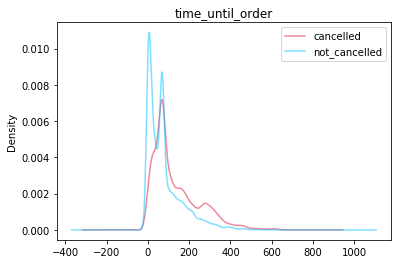

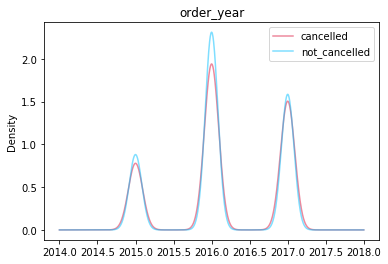

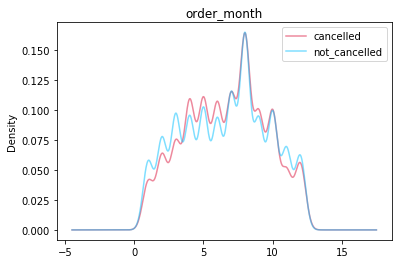

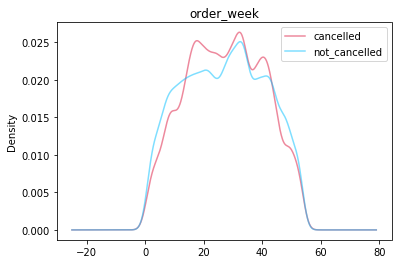

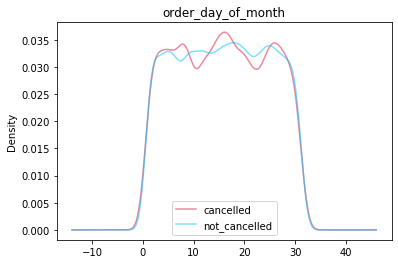

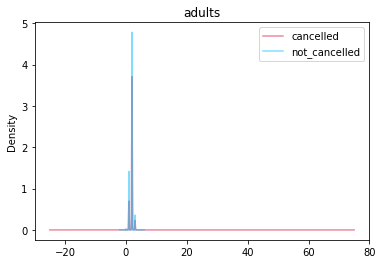

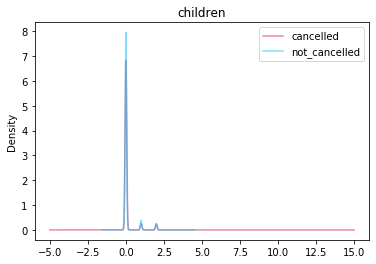

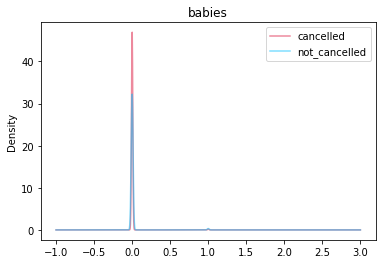

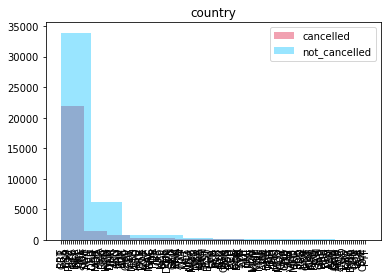

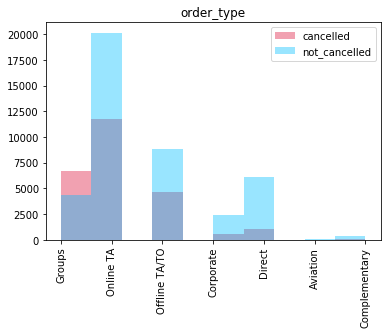

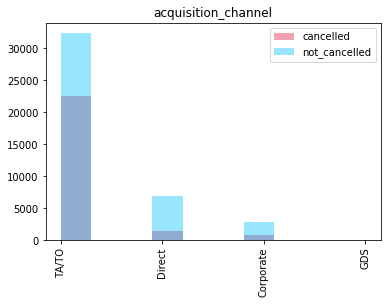

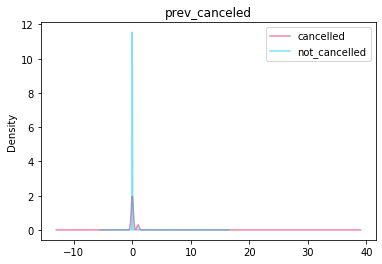

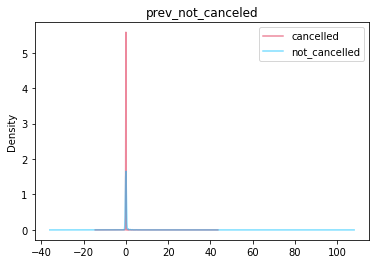

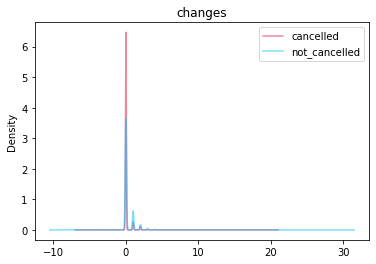

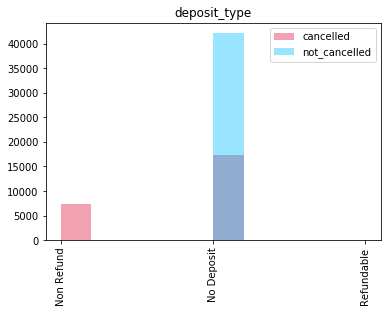

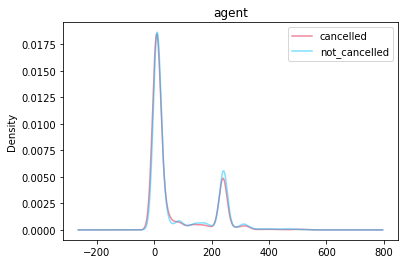

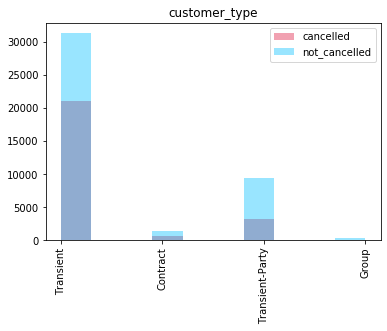

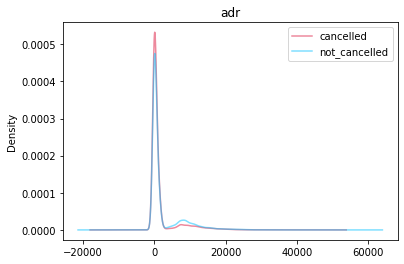

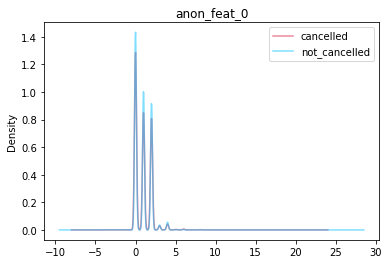

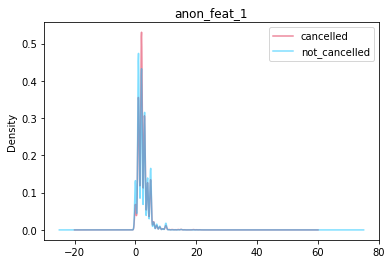

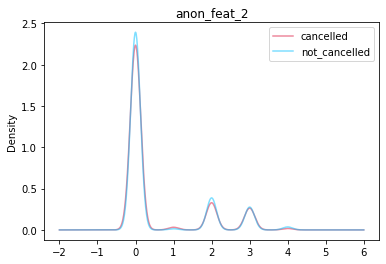

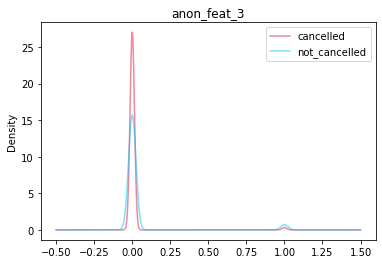

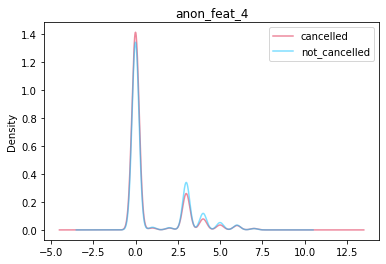

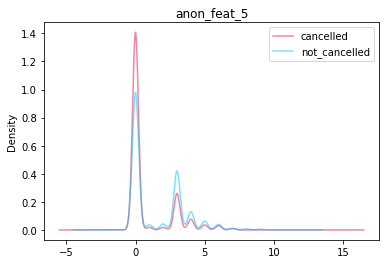

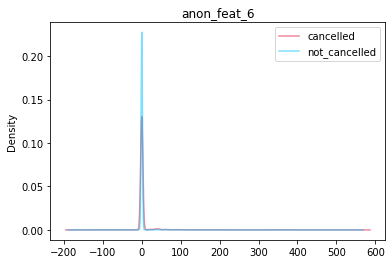

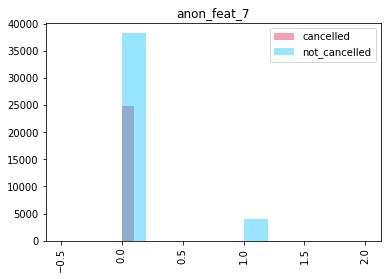

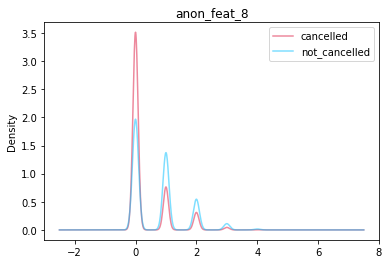

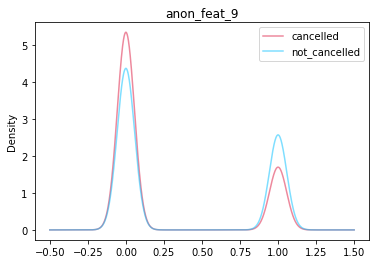

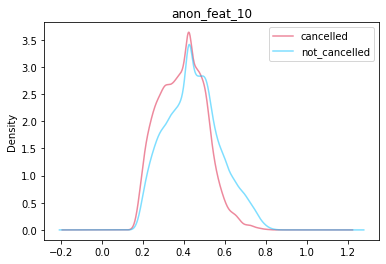

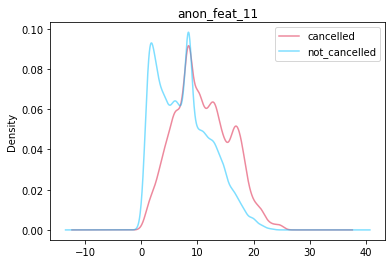

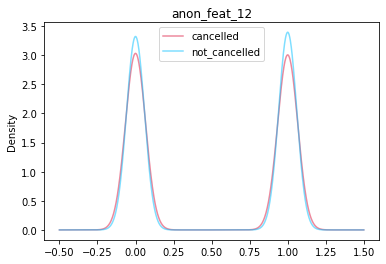

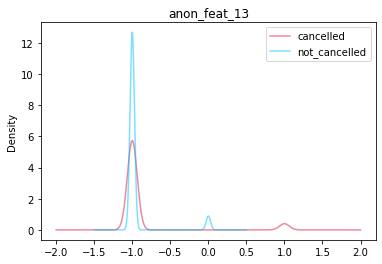

In [19]:
# Let's graph our features distributions according to each label, if we find features that distirbute equally 
# between both labels, we can conider removing them.
# For numeric features, we'll use a density plot, and for categorical features, we'll use a bar plot.
label_data =  labels.squeeze()
def numeric_features_density_label(df):
    column_numeric = df.select_dtypes(include = [np.number])
    column_obj = df.select_dtypes(include = [object, bool])
    column_obj.drop(['cancelation'], axis = 1, inplace = True)
    column_numeric = column_numeric.drop(columns = ['anon_feat_7'])
    for col in df.columns:
        pos = df[col][label_data.astype(bool)] # Take true labels
        neg = df[col][~label_data.astype(bool)] # Take false labels
        if col in column_numeric:
            pos.plot.density(color = 'crimson', alpha = 0.5, label = 'cancelled')
            neg.plot.density(color = 'deepskyblue', alpha = 0.5, label = 'not_cancelled')
            plt.legend()
            plt.title(col)
            plt.show()
        elif col in column_obj or col == 'anon_feat_7':
            plt.hist(pos,color = 'crimson',alpha=0.4, label = 'cancelled')
            plt.hist(neg,color = 'deepskyblue',alpha=0.4, label = 'not_cancelled')
            plt.title(col)
            plt.xticks(rotation = 90)
            plt.legend()
            plt.show()
train_graphs = first_aid_for_data(train)
train_with_labels = train_graphs.join(labels)
numeric_features_density_label(train_with_labels)

* [Get back to Project Table of Contents](#center)

### Outliers ###
<a id="outliers"></a>

Does your data contain outliers? Yes, our data containts outliers, but as we saw in the boxplots, the vast majority of the outliers are centered around 5 features (adr, time_until_order, agent, anon_feat_6 and anon_feat_10). As we can see below, removing samples from our data which contain outliers causes us to lose a significant amount of our data, so instead we chose to remove the outlier heavy features, excluding agent, since its outliers appear only in cancelled orders so we might be able to learn from them.

In [20]:
def take_out_outliers(df, num_of_stds):
    temp_df = df.copy()
    z_scores = sp.stats.zscore(temp_df)
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < num_of_stds).all(axis=1)
    df_without_outliers = temp_df[filtered_entries]
    return df_without_outliers

for i in range(3, 7):
    train_without_outliers = take_out_outliers(processed_train, i)
    print(f"{train.shape[0] - train_without_outliers.shape[0]} rows removed outstide of {i} standard deviations")

# We can see that removing outliers according to standard deviation causes us to lose alot of data, 
# Furthermore, since we chose to label encode our categorical variables, alot of 'outliers' are hidden
# within those encodings in columns which are dominated by one or two categories (like country), so this
# method doesn't handle these columns correctly.

20314 rows removed outstide of 3 standard deviations
9965 rows removed outstide of 4 standard deviations
6346 rows removed outstide of 5 standard deviations
1762 rows removed outstide of 6 standard deviations


* [Get back to Project Table of Contents](#center)

### Preprocessing on the test data ###
<a id="preprocessingtest"></a>

In [21]:
X_test = first_aid_for_data(X_test)
X_test = handle_categories(X_test)

# Part 3: Modelling #
<a id="part3"></a>
Ideal model parameters were found using grid_search_cv, and pre-processing functions were picked after testing and according to each models properties, here are some of the functions we used and why we used them:

KNN - For this model we chose to standardize the data before hand to prevent the scale of each feature from affecting the model disproportionately. 

Logistic Regression - For this model we chose to standardize the data since we were using l2 penalty,
which is affected by the scale of the features.

Random Forest - Here we chose not to normalize the data, since Random Forest is invariant to scale. This model performed the best out of all models both on the test and train datasets. We believe this happened since Random Forest are capable of non linear classification, can effectively handle outliers by seperating them away from the data, and can deal with our large dataset by generating more tress and deeper trees.

Multi Layered Perceptron - For this model we chose to normalize the data to aid in faster convergence and to reduce the probability of reaching a bad local minima. We indeed found that normalizing the data before running the MLP made it's performance much more consistent.




In [22]:
# Now after pre-processing our data, we'd like to efficiently test our models, for that we'll write
# a few helper functions

# Recieves fully split and pre-processed data and models it, displays an ROC-curve.
def full_model_test(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train['cancelation'].astype(int))
    preds_train = clf.predict_proba(X_train)[:, 1]
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train['cancelation'].astype(int).ravel(), \
                                                             preds_train)
    true_train_auc = auc(fpr_train, tpr_train)
    print(f"the train auc is {true_train_auc}")
    preds = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test['cancelation'].astype(int).ravel(), preds)
    true_auc = auc(fpr,tpr)
    print(f"the test auc is {true_auc}")
    plt.plot(fpr, tpr, label= f'ROC curve area = {true_auc:.4f}')
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"ROC curve for {str(clf).split('(')[0]}")
    plt.legend(loc="lower right")
    plt.show()
    return true_auc


# We'll use this function to test the removal of features from the data set efficiently.
# Final removals were chosen according to outlier heavy data, correlation 
# (low with label or high with other features), similiar label distributions and testing by hand
def feature_remover(df):
    temp_df = df.copy()
    temp_df = temp_df.drop(['time_until_order','anon_feat_4','adr','changes','anon_feat_12','anon_feat_0',\
                            'anon_feat_10','anon_feat_6'], axis = 1)
    return temp_df      

        
# Gets a df and a list of pre_processing functions and applys them to the df, meant to 
# help us efficiently test different pre-processing functions 
def pre_processor(df, funcs):
    temp_df = df.copy()
    for func in funcs:
        temp_df = globals()[str(func)](temp_df) # Access global dictionary and return function object
    return temp_df  

    

* [Get back to Project Table of Contents](#center)

# K-Nearest-Neighbors #
<a id="knn"></a>

the train auc is 0.9245664855516413
the test auc is 0.892450528774854


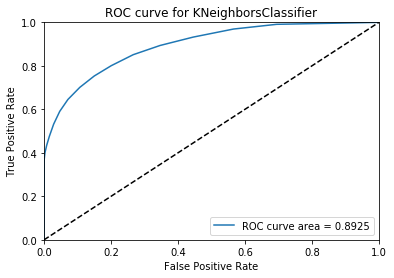

0.892450528774854

In [23]:
knn_clf = KNeighborsClassifier(n_neighbors = 15, weights = 'uniform', algorithm = 'auto', leaf_size=30, p=2, \
                               metric = 'minkowski', metric_params = None, n_jobs = -1)

knn_final_train = pre_processor(processed_train, ['feature_remover', 'family_size', 'cancel_eval'])
knn_final_test = pre_processor(X_test, ['feature_remover', 'family_size', 'cancel_eval'])
knn_final_train_norm, knn_final_test_norm = data_normalization_standard(knn_final_train, knn_final_test)

full_model_test(knn_clf, knn_final_train_norm, labels, knn_final_test_norm, y_test)

* [Get back to Project Table of Contents](#center)

# Logistic Regression #
<a id="lr"></a>

the train auc is 0.8574670601587601
the test auc is 0.8536978199209316


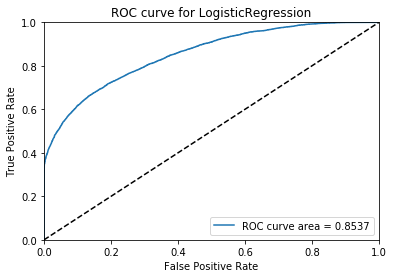

0.8536978199209316

In [24]:
log_clf = LogisticRegression(penalty='l2',dual=False, C=1, fit_intercept=True, intercept_scaling=1,\
                            class_weight=None, random_state=None, solver='lbfgs', max_iter=100,\
                            multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
log_final_train = pre_processor(processed_train, ['feature_remover','day_fix', 'log_transform', \
                                                  'cancel_eval'])
log_final_test = pre_processor(X_test, ['feature_remover','day_fix', 'log_transform', 'cancel_eval'])

log_final_train_norm, log_final_test_norm = data_normalization_standard(log_final_train, log_final_test)

full_model_test(log_clf, log_final_train_norm, labels, log_final_test_norm, y_test)

* [Get back to Project Table of Contents](#center)

# Random Forest #
<a id="rf"></a>

the train auc is 0.999221337200043
the test auc is 0.9514297890696932


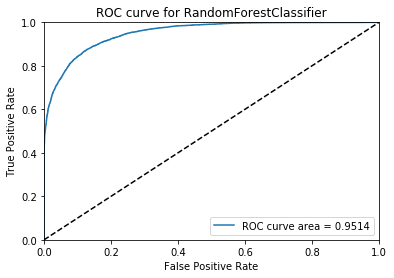

0.9514297890696932

In [25]:
rf_clf = RandomForestClassifier(n_estimators=1000, criterion='entropy', max_depth=None, \
                        min_samples_split=5, min_samples_leaf=1, \
                        min_weight_fraction_leaf=0.0, max_features='log2', max_leaf_nodes=None, \
                        min_impurity_decrease=0.0,min_impurity_split=None, bootstrap=True, \
                        oob_score=False, n_jobs=None, random_state=None, verbose=0, \
                        warm_start=False, class_weight=None)
rf_final_train = pre_processor(processed_train, ['feature_remover', 'day_fix','family_size'])
rf_final_test = pre_processor(X_test, ['feature_remover', 'day_fix','family_size'])
full_model_test(rf_clf, rf_final_train, labels, rf_final_test, y_test)


* [Get back to Project Table of Contents](#center)

# Multi-Layer Perceptron #
<a id="mlp"></a>

the train auc is 0.9373036337170813
the test auc is 0.9245393066332004


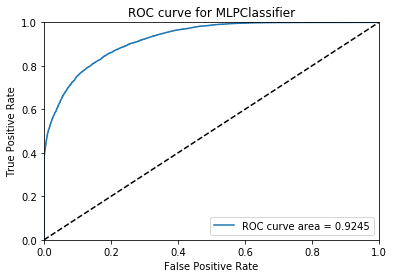

0.9245393066332004

In [26]:
mlp_clf = MLPClassifier(hidden_layer_sizes= (20, 20, 20), activation='relu', solver='adam', alpha=0.0001, \
                        batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, \
                        max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, \
                        warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, \
                        validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, \
                        n_iter_no_change=10)

mlp_final_train = pre_processor(processed_train, ['feature_remover','cancel_eval', 'family_size'])
mlp_final_test = pre_processor(X_test, ['feature_remover','cancel_eval', 'family_size'])
mlp_final_train_norm, mlp_final_test_norm = data_normalization_standard(mlp_final_train, mlp_final_test)
full_model_test(mlp_clf, mlp_final_train_norm, labels, mlp_final_test_norm, y_test)

* [Get back to Project Table of Contents](#center)

# Part 4: Model Evaluation #
<a id="part4"></a>

### Confusion Matrix ###
<a id="confusion"></a>

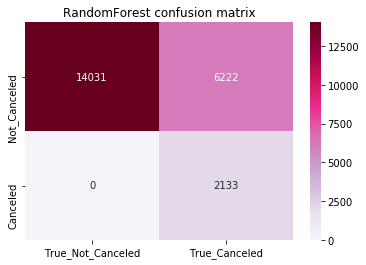

In [27]:
def my_confusion_matrix(clf, X_train, y_train, X_test, y_test):
    
    clf.fit(X_train, y_train['cancelation'].astype(int))
    preds_train = clf.predict_proba(X_train)[:, 1]
    preds = clf.predict_proba(X_test)[:, 1]
    cm = confusion_matrix(preds.astype(int), y_test.astype(int))
    sns.heatmap(cm, annot = True, cmap='PuRd', fmt = 'g', xticklabels = ['True_Not_Canceled','True_Canceled'], \
                yticklabels = ['Not_Canceled','Canceled'])
    plt.title('RandomForest confusion matrix')
    plt.show()
    
my_confusion_matrix(rf_clf, rf_final_train, labels, rf_final_test, y_test)


Top Left(True Negatives): In this cell we have the amount of orders that were predicted as 'not_cancelled' and were actually not cancelled.

Top Right(False Negatives): In this cell we have the amount of orders that our model predicted would not be canceled, however were actually canceled.

Bottom Right(True Positives): These are all of the orders that we predicted would be cancelled and were actually cancelled.

Bottom Left(False Positive): In this cell we have all of the predictions that the order would be cancelled, however the order was not cancelled. 

Looking at our confusion matrix, we can see that we barely have any false positives(meaning our model predicting someone will cancel and being wrong), however we have a high false negative rate.So for example, a hotel can strongly believe our model when it predicts and order will be canceled, and rebook the room to other customers. For bussines purposes, the probablity threshold can be adjusted in order to meet specific bussines needs.



* [Get back to Project Table of Contents](#center)

### K-Fold Cross Validation ###
<a id="kfold"></a>

In [28]:
# Function that recieves a model, data and k, and generates an ROC plot for each split in the KFold
def k_fold_plotter(model, X, y, k):
    mean_auc = 0.0
    plt.figure()
    kf = KFold(n_splits = k, random_state = None, shuffle = False)
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    i = 1
    aucs = []
    for train_index, validation_index in kf.split(X):
        print(f'Validating split number {i}')
        X_train, X_validation = X.iloc[train_index], X.iloc[validation_index]
        y_train, y_validation = y.iloc[train_index], y.iloc[validation_index]
        model.fit(X_train, y_train)
        prob_prediction = model.predict_proba(X_validation)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_validation, prob_prediction)
        mean_tpr += interp(mean_fpr, fpr, tpr)
        curr_auc = auc(fpr, tpr)
        aucs.append(curr_auc)
        print(f"the auc of split number {i} is {curr_auc:.4f}")
        mean_auc += curr_auc
        mean_tpr[0] = 0.0
        plt.plot(fpr, tpr, color = '#D3D3D3')
        i += 1    
    plt.plot([0], [0], color='#D3D3D3', linestyle = '-', label='K-folds')       
    mean_tpr /= k
    mean_tpr[-1] = 1.0
    mean_auc /= k
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.plot(mean_fpr, mean_tpr, color = 'crimson', linestyle='-', label = \
             f'Mean ROC (area = {mean_auc:.4f})')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    model_name = str(model).split("(")[0] ## Extracting model name
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC for {model_name}')
    plt.legend()
    plt.show()

Validating split number 1
the auc of split number 1 is 0.8919
Validating split number 2
the auc of split number 2 is 0.8941
Validating split number 3
the auc of split number 3 is 0.8931
Validating split number 4
the auc of split number 4 is 0.8929
Validating split number 5
the auc of split number 5 is 0.8924
Validating split number 6
the auc of split number 6 is 0.8953
Validating split number 7
the auc of split number 7 is 0.8942
Validating split number 8
the auc of split number 8 is 0.9017
Validating split number 9
the auc of split number 9 is 0.8944
Validating split number 10
the auc of split number 10 is 0.8960


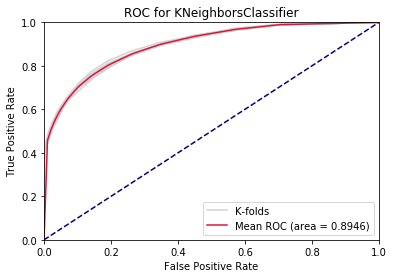

In [29]:
k_fold_plotter(knn_clf, knn_final_train_norm, labels, 10)

Validating split number 1
the auc of split number 1 is 0.8637
Validating split number 2
the auc of split number 2 is 0.8531
Validating split number 3
the auc of split number 3 is 0.8517
Validating split number 4
the auc of split number 4 is 0.8606
Validating split number 5
the auc of split number 5 is 0.8551
Validating split number 6
the auc of split number 6 is 0.8497
Validating split number 7
the auc of split number 7 is 0.8605
Validating split number 8
the auc of split number 8 is 0.8650
Validating split number 9
the auc of split number 9 is 0.8579
Validating split number 10
the auc of split number 10 is 0.8544


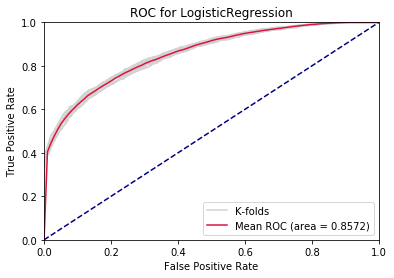

In [30]:
k_fold_plotter(log_clf,log_final_train_norm, labels, 10)

Validating split number 1
the auc of split number 1 is 0.9529
Validating split number 2
the auc of split number 2 is 0.9498
Validating split number 3
the auc of split number 3 is 0.9508
Validating split number 4
the auc of split number 4 is 0.9515
Validating split number 5
the auc of split number 5 is 0.9517
Validating split number 6
the auc of split number 6 is 0.9519
Validating split number 7
the auc of split number 7 is 0.9517
Validating split number 8
the auc of split number 8 is 0.9565
Validating split number 9
the auc of split number 9 is 0.9499
Validating split number 10
the auc of split number 10 is 0.9511


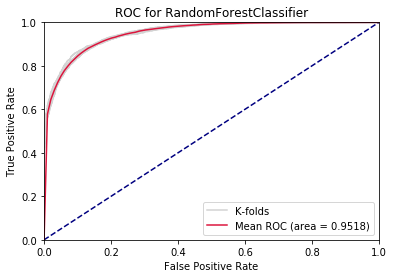

In [31]:
k_fold_plotter(rf_clf, rf_final_train, labels, 10)

Validating split number 1
the auc of split number 1 is 0.9278
Validating split number 2
the auc of split number 2 is 0.9229
Validating split number 3
the auc of split number 3 is 0.9269
Validating split number 4
the auc of split number 4 is 0.9291
Validating split number 5
the auc of split number 5 is 0.9278
Validating split number 6
the auc of split number 6 is 0.9251
Validating split number 7
the auc of split number 7 is 0.9328
Validating split number 8
the auc of split number 8 is 0.9311
Validating split number 9
the auc of split number 9 is 0.9286
Validating split number 10
the auc of split number 10 is 0.9259


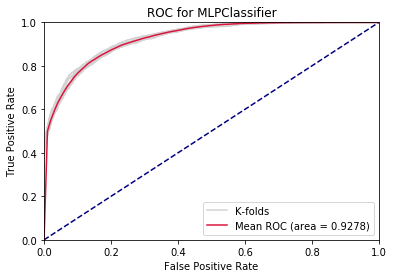

In [32]:
k_fold_plotter(mlp_clf, mlp_final_train_norm, labels, 10)

### Are the models overfitted ? ###
<a id="overfitted"></a>


Observing the mean AUC's from the K-FoldCV and our test AUC's from the modelling stage we can see that none of our models overfit. However, for logistic regression, we can see that the validation ROC curves are a little less consistent than for the other models.

In order to ensure our models generalization was good, we split the whole of our training data, into compeletely seperate training and testing data. This meant that all of our decision making process was influenced only by the training data, so that our model wouldn't overfit.

* [Get back to Project Table of Contents](#center)

# Part 5: Prediction #
<a id="part5"></a>

In [33]:
# Let's prepare the final prediction:
# We'll load the test data and pre-process it
# We'll use the original full training data to increase the amount of training samples for our model
# Load a new RandomForestClassifier with the ideal hyper-parameters and fit on our full data
# Perform predicitions on the test data, join with the proper indeces, and load into a csv.
test = pd.read_csv('feature_data_test.csv',\
                  index_col = 0)
test.reset_index().drop(['index'],axis=1)
test = pre_processor(test, ['first_aid_for_data', 'handle_categories', 'feature_remover'\
                           ,'day_fix', 'family_size'])
final_rf_clf = RandomForestClassifier(n_estimators=1000, criterion='entropy', max_depth=None, \
                        min_samples_split=5, min_samples_leaf=1, \
                        min_weight_fraction_leaf=0.0, max_features='log2', max_leaf_nodes=None, \
                        min_impurity_decrease=0.0,min_impurity_split=None, bootstrap=True, \
                        oob_score=False, n_jobs=None, random_state=None, verbose=0, \
                        warm_start=False, class_weight=None)

full_train.reset_index().drop(['index'], axis=1) 
final_full_train = pre_processor(full_train, ['first_aid_for_data', 'handle_categories', 'feature_remover'\
                           ,'day_fix', 'family_size'])
final_rf_clf.fit(final_full_train, full_labels['cancelation'].astype(int))
preds = final_rf_clf.predict_proba(test)[:, 1]
preds_df = pd.DataFrame(index = test.index, data = preds)
preds_df.columns = ['prediction_probabilities']


In [34]:
# preds_df.to_csv('Submission_group_17.csv')

* [BACK TO THE BEGINNING OF THE PROJECT](#center)